### Insert Data

In [5]:
%matplotlib inline
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [6]:
#Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , mnist.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", mnist.target.shape)

Image Data Shape (70000, 784)
Label Data Shape (70000,)


### Splitting Data into Training and Test Sets (MNIST)

In [7]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [8]:
print(train_img.shape)

(60000, 784)


In [9]:
print(train_lbl.shape)

(60000,)


In [10]:
print(test_img.shape)

(10000, 784)


In [11]:
print(test_lbl.shape)

(10000,)


### Showing the Images and Labels (MNIST)

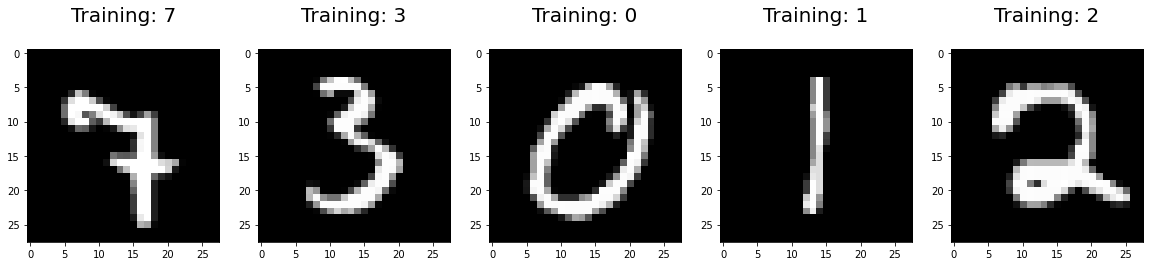

In [13]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %s\n' % label, fontsize = 20)

### Model building

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [16]:
logisticRegr.fit(train_img, train_lbl)

C:\Users\Sneh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

In [18]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

In [19]:
# Make predictions on entire test data
predictions = logisticRegr.predict(test_img)

In [21]:
predictions

array(['0', '4', '1', ..., '1', '3', '0'], dtype=object)

### Measuring Model Performance

In [22]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9184


In [23]:
Accuracy = score*100
print(Accuracy)

91.84
